In [2]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=e0b87d9bfa606c47ea4f2d8a7a8eedf879a9a3e24effd5641c6e880b7daf724d
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


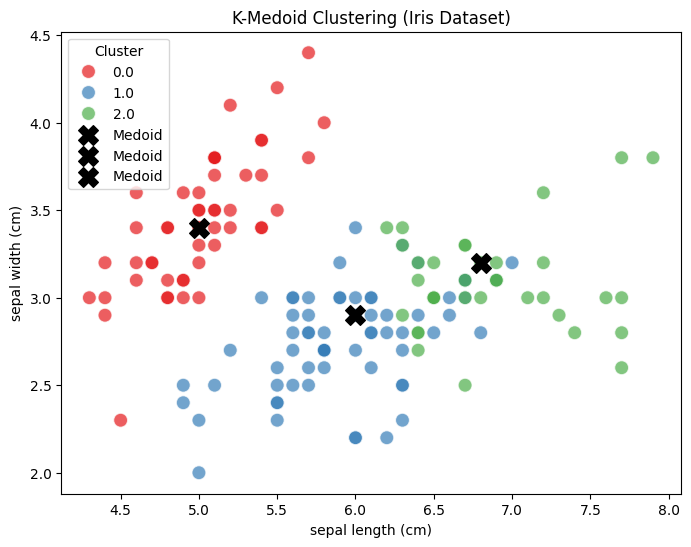

Indices of Medoids: [7, 78, 143]


In [3]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from pyclustering.cluster.kmedoids import kmedoids
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Loading the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal/Petal lengths and widths
y = iris.target  # Classes: 0 (setosa), 1 (versicolor), 2 (virginica)

# Number of clusters
k = 3

# Randomly initializing the medoids (indices of medoid points in the dataset)
initial_medoids = [0, 50, 100]  # Indices of the initial medoids

# Applying the K-Medoid clustering algorithm (PAM method)
kmedoids_instance = kmedoids(X, initial_medoids)
kmedoids_instance.process()

# Getting the cluster labels and medoids
clusters = kmedoids_instance.get_clusters()  # List of clusters
medoids = kmedoids_instance.get_medoids()  # Indices of the medoids

# Assigning the cluster labels to the data points
labels = np.zeros(len(X))
for i, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = i

# Adding cluster labels to the dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = labels

# Plotting the clusters (using two features for 2D visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[iris.feature_names[0]], y=df[iris.feature_names[1]], hue=df['Cluster'], palette='Set1', s=100, alpha=0.7)

# Marking the medoids on the plot
for medoid in medoids:
    plt.scatter(X[medoid, 0], X[medoid, 1], marker='X', s=200, c='black', label="Medoid")

plt.title('K-Medoid Clustering (Iris Dataset)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster', loc='upper left')
plt.show()

# Print the indices of the medoids
print(f"Indices of Medoids: {medoids}")
